<a href="https://colab.research.google.com/github/GarimaPuri94/MNIST-Handwritten-Digit-Recognition-/blob/main/MNIST_Dataset_For_Handwritten_Digit_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
np.random.seed(42)                          # This allows us to reproduce the results from our script
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical  # Use to_categorical instead of np_utils

##Importing handwritten Digit Recognition mnist dataset and dividing the data into test and train

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# In cell ipython-input-4-4133b87b1e90
Y_train # Use Y_train_ instead of Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

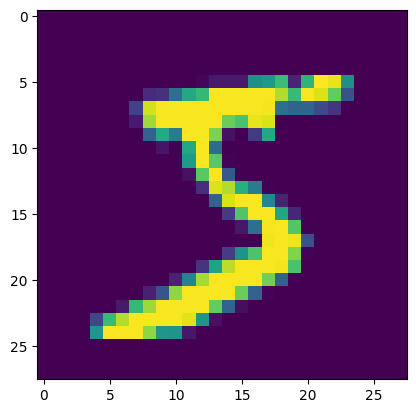

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

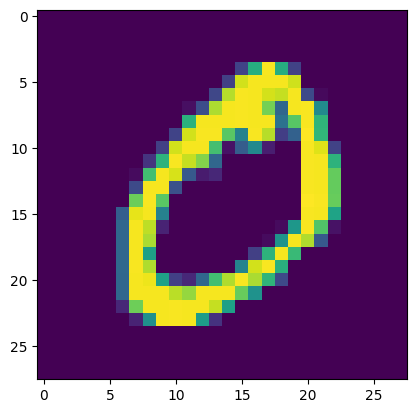

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

# Checkout input dataset

In [ ]:
# In cell ipython-input-3-b5eaee2c16a8
print('Total no of Images: ',X_train.shape[0])
print('Size of Image:', X_train.shape[1:])
print('Total no of labels:', Y_train.shape) # Changed Y_train to Y_train_

Total no of Images:  60000
Size of Image: (28, 28)
Total no of labels: (60000,)


#Examples of Handwritten Digit Recognition

Label: 5


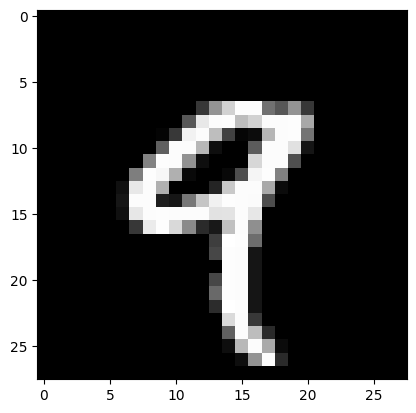

In [ ]:
#look input data

plt.imshow(X_train[4], cmap = plt.get_cmap('gray'))  # cmap - convert image into grascale
print('Label:',Y_train[0])

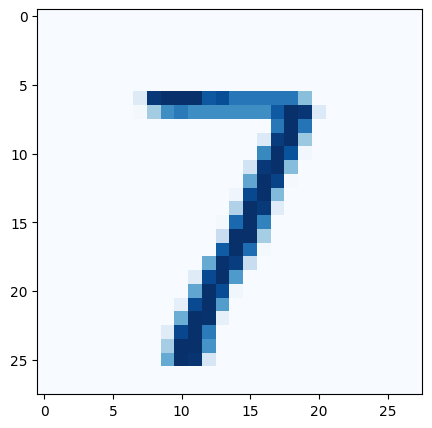

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[560], cmap="Blues")
plt.show()

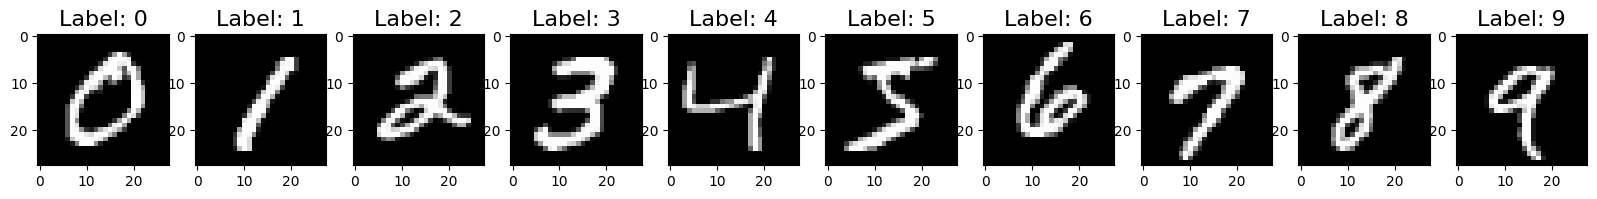

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = X_train[Y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

# Prepare input data
For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.

We can do this transform easily using the reshape() function on the NumPy array. We can also reduce our memory requirements by forcing the precision of the pixel values to be 32 bit.

In [ ]:
X_train = X_train.reshape((X_train.shape[0],-1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


# Normalize Input data
The pixel values are gray scale between 0 and 255. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255.

In [ ]:
X_train = X_train/255
X_test = X_test/255

# print(X_train[0])
X_train.shape

(60000, 784)

# One-hot Encoding
Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

## What is Categorial Data?
Categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set.
Convert Categorical Data to Numerical Data.
Here, the integer encoded variable is removed and a new binary variable is added for each unique integer value.

i.e

In the “color” variable example, there are 3 categories and therefore 3 binary variables are needed. A “1” value is placed in the binary variable for the color and “0” values for the other colors.

one-hot.jpg

We can easily do this using the built-in np_utils.to_categorical() helper function in Keras.

In [ ]:
# One-hot encoding
import tensorflow.keras.utils as np_utils
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print(Y_train.shape)


(60000, 10)


In [ ]:
num_classes = Y_test.shape[1]
num_pixels = 784

# Define Model
Input size of our model - 784 (28 x 28). There are 2 hidden layers with 256 and 64 neurons in each.

In hidden layers, we will use relu activation function. And in final output layer, we'll use softmax activation function.

In [ ]:
# define baseline model

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(256, input_dim=num_pixels, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [ ]:
# build the model
model = baseline_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

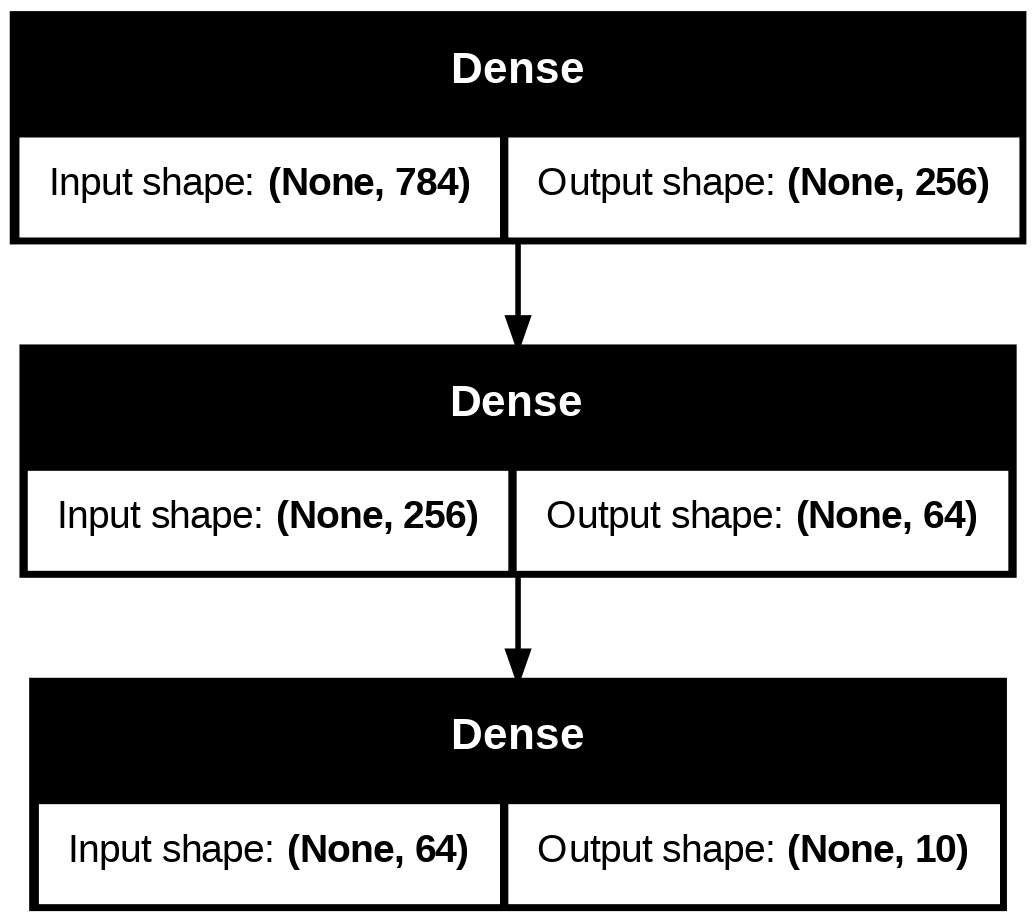

In [ ]:
# Plot the model for better understanding

tf.keras.utils.plot_model(model, show_shapes = True)


# Compile Model
A compiled model refers to a machine learning model that has been processed to make it ready for training​.

Loss Function: Categorical Crossentropy
The categorical crossentropy is well suited to classification tasks, since one example can be considered to belong to a specific category with probability 1, and to other categories with probability 0.

Optimizer: SGD (Stochastic Gradient Descent)¶
Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable).

opt = SGD(lr = 0.001)



In [ ]:
opt = SGD(learning_rate = 0.001) # Use learning_rate instead of lr
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

# Train the Model
To fit the model, all we have to do is declare the batch size and number of epochs to train for, then pass in our training data.

In [ ]:
model.fit(X_train, Y_train, epochs=10, validation_split=0.2) # Changed 'vadilation_split' to 'validation_split'

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2830 - loss: 2.1546 - val_accuracy: 0.6832 - val_loss: 1.4713
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7191 - loss: 1.3127 - val_accuracy: 0.8185 - val_loss: 0.8577
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8197 - loss: 0.8090 - val_accuracy: 0.8581 - val_loss: 0.6089
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8502 - loss: 0.6128 - val_accuracy: 0.8755 - val_loss: 0.4972
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8685 - loss: 0.5160 - val_accuracy: 0.8885 - val_loss: 0.4354
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8827 - loss: 0.4556 - val_accuracy: 0.8960 - val_loss: 0.3960
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8876 - loss: 0.4174 - val_accuracy: 0.9004 - val_loss: 0.3691
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8935 - loss: 0.3851 - 

# Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)
print('Test accuracy on 1500 test samples',test_loss)
print('vadilation accuracy on 1500 test samples',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8949 - loss: 0.3738
Test accuracy: 0.9110000133514404
Test accuracy on 1500 test samples 0.32239383459091187
vadilation accuracy on 1500 test samples 0.9110000133514404


In [ ]:
predictions=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(predictions)

[[9.7426535e-05 1.0019153e-05 1.0534943e-04 ... 9.9480844e-01
  1.5294025e-04 3.9761513e-03]
 [1.7580684e-02 2.5544176e-04 8.1033927e-01 ... 2.2481350e-07
  7.7805775e-03 6.1624924e-06]
 [2.2063102e-04 9.5735484e-01 9.1318246e-03 ... 5.3964672e-03
  6.8106386e-03 1.8440293e-03]
 ...
 [1.0940151e-05 3.1282110e-05 5.7360023e-05 ... 1.8916755e-03
  8.7047201e-03 8.3311193e-02]
 [5.8770813e-03 1.3438495e-03 9.2902855e-04 ... 2.2604542e-04
  1.4291704e-01 3.5332571e-04]
 [9.7938860e-04 5.8913492e-09 1.8950814e-03 ... 7.2069377e-09
  7.2019534e-06 9.1291918e-07]]


In [ ]:
print(np.argmax(predictions[0]))

7


# Predict the New Images
Now, we can try our own image to predict digit value of 1 and 2 as a example

In [ ]:
import cv2

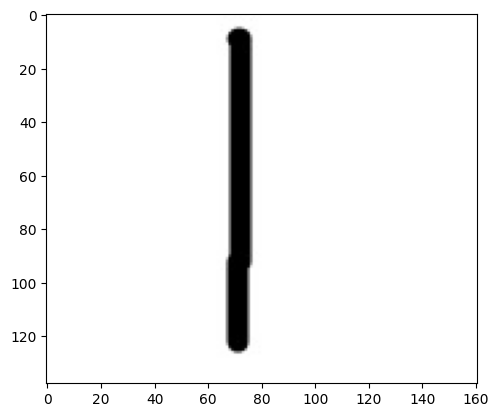

In [ ]:
img = cv2.imread('/content/HDR 1.jpg')
plt.imshow(img)

In [ ]:
img.shape

(138, 161, 3)

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(138, 161)

In [ ]:
img_resize = img_resize/255

In [ ]:
type(img_resize)

numpy.ndarray

In [ ]:
predictions= model.predict([X_test])

print('label 1 ',Y_test[2])
print('prediction -> ',np.argmax(predictions[2]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
label 1  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
prediction ->  1


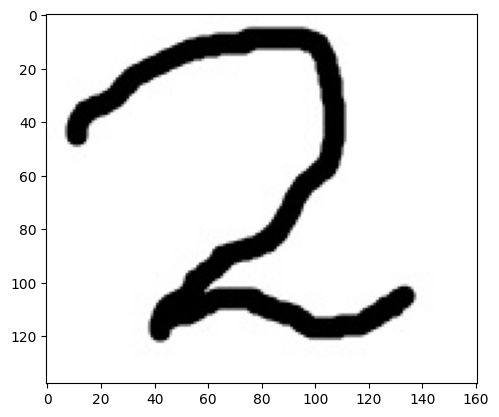

In [ ]:
img = cv2.imread('/content/HDR 2.jpg')
plt.imshow(img)



In [ ]:
predictions= model.predict([X_test])

print('label 2 ',Y_test[1])
print('prediction -> ',np.argmax(predictions[1]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
label 2  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
prediction ->  2
